In [2]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
from preprocessing import *
from model import *
import math
import matplotlib.pyplot as plt

# to autoreload modules on code change
%load_ext autoreload
%autoreload 2

# Data preprocessing using pandas!!

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
for index, row in df.iterrows():
    a = row['pixels']
    break

In [19]:
np.array(a.split()).resize(48,48)

In [3]:
df.count()

emotion    35887
pixels     35887
Usage      35887
dtype: int64

In [4]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [5]:
df2 = df.groupby('emotion').count()
df2

,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


## distribution of whole dataset 

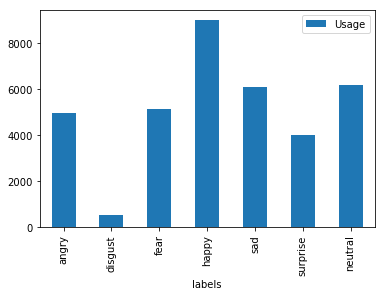

In [6]:
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']
df2['labels'] = pd.Series(emotion_labels)
df2.reset_index().plot(kind='bar',x='labels',y='Usage')

## distribution of train dataset 

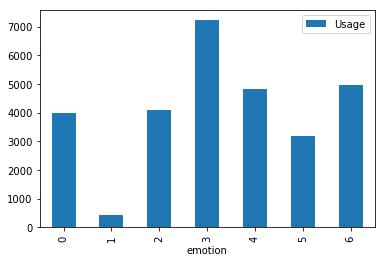

In [7]:
df[df['Usage'] == 'Training'].groupby('emotion').count().reset_index().plot(kind='bar',x='emotion',y='Usage')
df_train = df[df['Usage'] == 'Training']

## distribution of test set

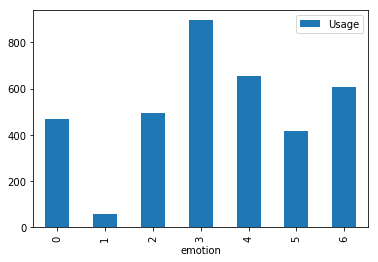

In [8]:
df[df['Usage'] == 'PublicTest'].groupby('emotion').count().reset_index().plot(kind='bar',x='emotion',y='Usage')

## Distribution of private test set!!

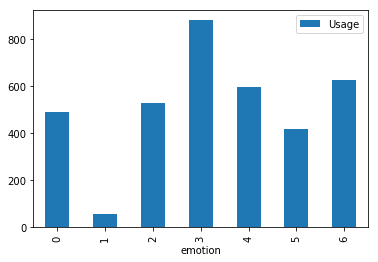

In [9]:
df[df['Usage'] == 'PrivateTest'].groupby('emotion').count().reset_index().plot(kind='bar',x='emotion',y='Usage')

** The distibution of all the three set is same hence this sanity check is completed **

In [39]:
del df